In [2]:
#IMPORTING NESCESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
#reading xls file
train_data = pd.read_excel('Data_Train.xlsx')

In [4]:
pd.set_option('display.max_columns',None)
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#CHECKING FOR NULL VALUES
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#as there are almost no null values,removing those few rows
train_data.dropna(inplace=True)
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


CORRECTING THE TIME AND DURATION COLUMNS TO SUITABLE FORMAT

In [9]:
#EXTRACTING ONLY DATE AND MONTH FROM THE JOURNEY TIME STAMP
#DATE === Date of a specific month
#MONTH === Possible Seasonal variation
train_data.Date_of_Journey.value_counts().head()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
Name: Date_of_Journey, dtype: int64

In [10]:
#Extracting the journey date
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_data.Journey_day

0        24.0
1         1.0
2         9.0
3        12.0
4         1.0
         ... 
10678     9.0
10679    27.0
10680    27.0
10681     1.0
10682     9.0
Name: Journey_day, Length: 10682, dtype: float64

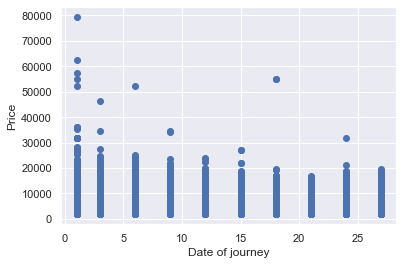

In [11]:
#variation of price with journey date
plt.scatter(x=train_data.Journey_day,y=train_data.Price,)
plt.xlabel("Date of journey")
plt.ylabel("Price")
plt.show()

In [12]:
#Extracting the journey month
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
train_data.Journey_month


0        3.0
1        5.0
2        6.0
3        5.0
4        3.0
        ... 
10678    4.0
10679    4.0
10680    4.0
10681    3.0
10682    5.0
Name: Journey_month, Length: 10682, dtype: float64

In [13]:

train_data.Journey_month.value_counts()
#As we can see we primarily have data of only months of March,April,May,June (POSSIBLE SUMMER DATA) 

5.0    3465
6.0    3414
3.0    2383
4.0    1079
Name: Journey_month, dtype: int64

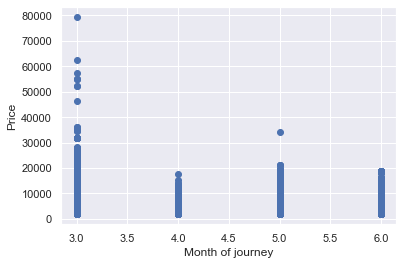

In [14]:
#variation of price with journey month
plt.scatter(x=train_data.Journey_month,y=train_data.Price,)
plt.xlabel("Month of journey")
plt.ylabel("Price")
plt.show()

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1.0,5.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9.0,6.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12.0,5.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1.0,3.0


In [16]:
#dropping redundant column date of journey
train_data.drop(['Date_of_Journey'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1.0,3.0


In [17]:

train_data.Dep_Time.value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: Dep_Time, Length: 222, dtype: int64

In [18]:
#custom function to convert time to hours (24 hrs format)
def convertToHours(time):
    tokens = time.split(':')
    hh = int(tokens[0])
    mm = int(tokens[1])
    return round((hh + mm/60.0),2)

convertToHours("10:00")


10.0

In [19]:
#Converting Departure-Time to only 24 hours format (float)
train_data.Dep_Time = train_data['Dep_Time'].apply(lambda x: convertToHours(x))
train_data.Dep_Time.value_counts()

18.92    233
17.00    227
7.08     205
10.00    203
7.17     202
        ... 
16.42      1
1.58       1
21.58      1
4.25       1
3.00       1
Name: Dep_Time, Length: 222, dtype: int64

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,01:10 22 Mar,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13:15,7h 25m,2 stops,No info,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,04:25 10 Jun,19h,2 stops,No info,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.08,23:30,5h 25m,1 stop,No info,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.83,21:35,4h 45m,1 stop,No info,13302,1.0,3.0


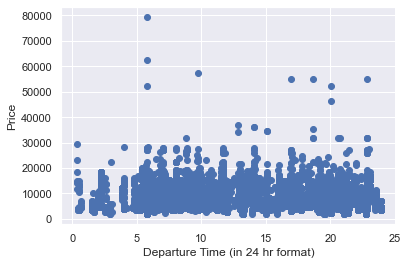

In [21]:
from matplotlib.pyplot import figure

#checking possible dependency of price on dep times
plt.scatter(x=train_data.Dep_Time,y=train_data.Price)
plt.xlabel("Departure Time (in 24 hr format)")
plt.ylabel("Price")
plt.show()

Dep_Time
0.33     18635.333333
0.42      3737.571429
0.50      6434.285714
0.67      5251.333333
1.50      4329.757576
             ...     
23.00    12572.285714
23.08    14133.954545
23.42     5741.125000
23.50     6259.654545
23.92     4568.800000
Name: Price, Length: 222, dtype: float64


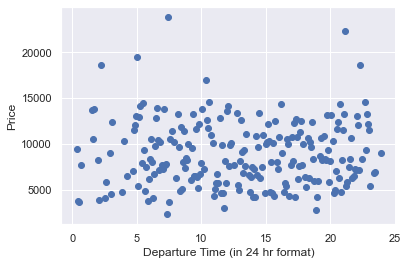

In [22]:
tt = train_data.groupby(['Dep_Time'])["Price"].mean()
print (tt)
#checking possible dependency of price on dep times
plt.scatter(x=train_data.Dep_Time.unique(),y=tt)
plt.xlabel("Departure Time (in 24 hr format)")
plt.ylabel("Price")
plt.show()

In [23]:
#Analysing the Arrival time column
train_data.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [24]:
#Custom function to convert arrival timestamps to 24 HR FORMAT

def convertArrivalTimeToHour(time):
    tokens = time[:5].split(":")
    arrival_hr = int(tokens[0])
    arrival_min = int(tokens[1])
    return round((arrival_hr + arrival_min/60.0),2)

convertArrivalTimeToHour("21:20 13 Mar")


21.33

In [25]:
#Converting Arrival-Time to only 24 hours format (float)
train_data.Arrival_Time = train_data['Arrival_Time'].apply(lambda x: convertArrivalTimeToHour(x))
train_data.Arrival_Time.value_counts()

19.00    618
4.42     589
19.25    573
12.58    444
21.00    360
        ... 
13.17      1
11.25      1
3.67       1
16.00      1
11.58      1
Name: Arrival_Time, Length: 223, dtype: int64

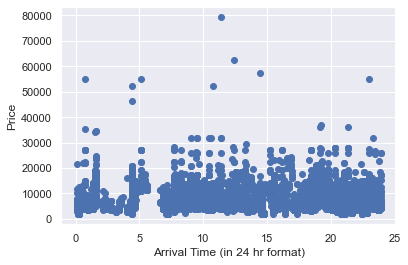

In [26]:
#variation of price with arrival time each day
plt.scatter(x=train_data.Arrival_Time,y=train_data.Price)
plt.xlabel("Arrival Time (in 24 hr format)")
plt.ylabel("Price")
plt.show()

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,1.17,2h 50m,non-stop,No info,3897,24.0,3.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13.25,7h 25m,2 stops,No info,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,4.42,19h,2 stops,No info,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.08,23.50,5h 25m,1 stop,No info,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.83,21.58,4h 45m,1 stop,No info,13302,1.0,3.0


In [28]:
import re
pattern = re.compile("^[1-9]{1,3}m$")


#Exploring the duration column
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [29]:
#custom function to clean the duration times in @$ HR Format
def cleanDuration(time):
    hours = 0
    minutes = 0
    if 'h' in time:
        tokens = time.split('h')
        hours = int(tokens[0])
        if 'm' in time:
            minutes = int(tokens[1][1:(tokens[1].index('m'))])
    else:
        tokens = time.split('m')
        minutes = int(tokens[0])
    
    return round((hours + minutes/60),2)

cleanDuration("20h 5m")


20.08

In [30]:
#cleaning duration times
train_data.Duration = train_data['Duration'].apply(lambda x: cleanDuration(x))
train_data.Duration.value_counts()

2.83     550
1.50     386
2.75     337
2.92     337
2.58     329
        ... 
31.50      1
30.42      1
42.08      1
4.17       1
47.67      1
Name: Duration, Length: 368, dtype: int64

In [31]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,1.17,2.83,non-stop,No info,3897,24.0,3.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13.25,7.42,2 stops,No info,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,4.42,19.00,2 stops,No info,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.08,23.50,5.42,1 stop,No info,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.83,21.58,4.75,1 stop,No info,13302,1.0,3.0


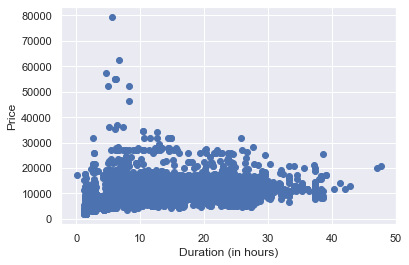

In [32]:
#variation of price with duration time
plt.scatter(x=train_data.Duration,y=train_data.Price)
plt.xlabel("Duration (in hours)")
plt.ylabel("Price")
plt.show()

Dep_Time
0.33     18635.333333
0.42      3737.571429
0.50      6434.285714
0.67      5251.333333
1.50      4329.757576
             ...     
23.00    12572.285714
23.08    14133.954545
23.42     5741.125000
23.50     6259.654545
23.92     4568.800000
Name: Price, Length: 222, dtype: float64


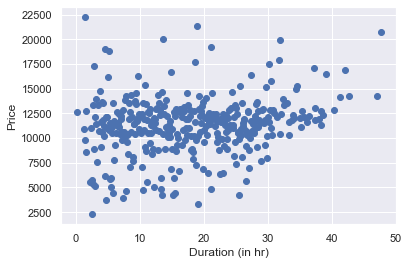

In [33]:
td = train_data.groupby(['Duration'])["Price"].mean()
print (tt)
#checking possible dependency of price on dep times
plt.scatter(x=train_data.Duration.unique(),y=td)
plt.xlabel("Duration (in hr)")
plt.ylabel("Price")
plt.show()

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22.33,1.17,2.83,non-stop,No info,3897,24.0,3.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,5.83,13.25,7.42,2 stops,No info,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9.42,4.42,19.00,2 stops,No info,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18.08,23.50,5.42,1 stop,No info,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16.83,21.58,4.75,1 stop,No info,13302,1.0,3.0


HANDLING CATEGORICAL COLUMNS
Nominal data vs Ordinal data:
Examples of nominal data include country, gender, race, hair color etc. of a group of people, while that of ordinal data includes having a position in class as “First” or “Second”. Note that the nominal data examples are nouns, with no order to them while ordinal data examples come with a level of order. 

Consider the two examples below:

How was your customer service experience? 
_____

b. How was your customer service experience?

->Good
->Neutral
->Bad
The data to be collected from Example I. is a nominal data, while that of II. is an ordinal data. 

For nominal data use -> One hot encoder
For ordinal data use -> Label encoder

In [35]:
#handing the airline column
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

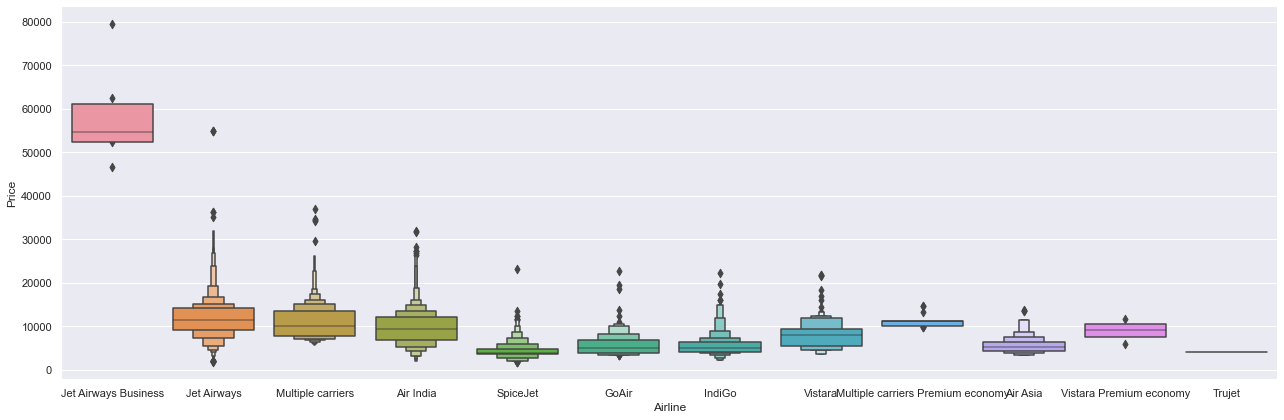

In [36]:
#comparing median price of each airlines
sns.catplot(y = "Price",x = "Airline", data = train_data.sort_values("Price",ascending=False),kind = "boxen", height = 6, aspect = 3)
plt.show()

#as we see Jet airways have highest price while all other companies almost have comparatively similar prices

In [37]:
#as airline is nominal categorical data performing one - hot encoding on it
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline,drop_first = True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [38]:
#exploring the source column
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

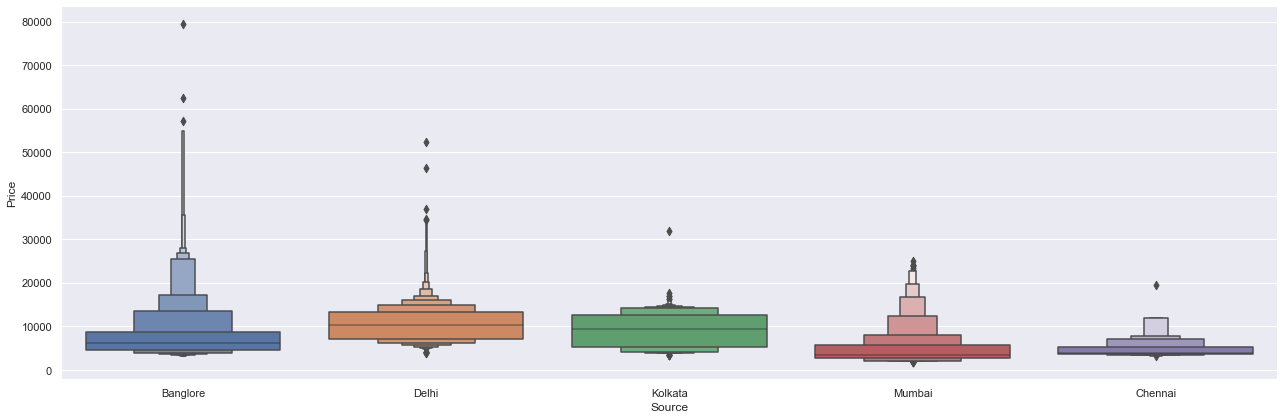

In [39]:
#source vs price comparison
sns.catplot(y = "Price",x = "Source", data = train_data.sort_values("Price",ascending=False),kind = "boxen", height = 6, aspect = 3)
plt.show()

In [40]:
#perform one hot encoding on the source feature
Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [41]:
#exploring destination column
train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

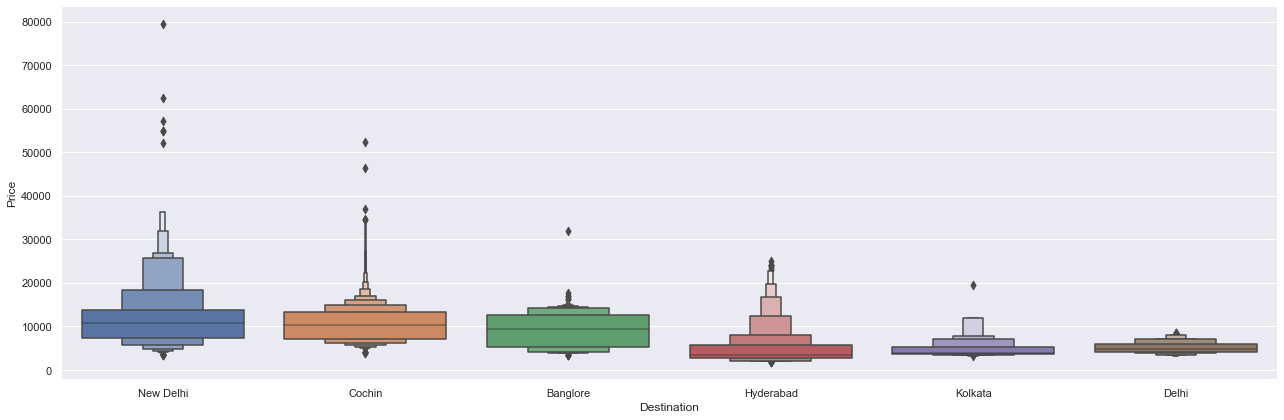

In [42]:
#Destination vs price comparison
sns.catplot(y = "Price",x = "Destination", data = train_data.sort_values("Price",ascending=False),kind = "boxen", height = 6, aspect = 3)
plt.show()

In [43]:
#perform one hot encoding on the Destination feature
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [44]:
#exploring route column
train_data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [45]:
train_data.Total_Stops

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [46]:
train_data.Additional_Info.value_counts()
#so maximum of these rows is no info, so we can drop this column too

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [47]:
#as we can see the route is actually represented using the total stops feature so we can drop route and additional info columns
train_data.drop(["Route","Additional_Info"], axis=1, inplace=True)

In [48]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22.33,1.17,2.83,non-stop,3897,24.0,3.0
1,Air India,Kolkata,Banglore,5.83,13.25,7.42,2 stops,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,9.42,4.42,19.00,2 stops,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,18.08,23.50,5.42,1 stop,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,16.83,21.58,4.75,1 stop,13302,1.0,3.0


In [49]:
#cleaning total stops column
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

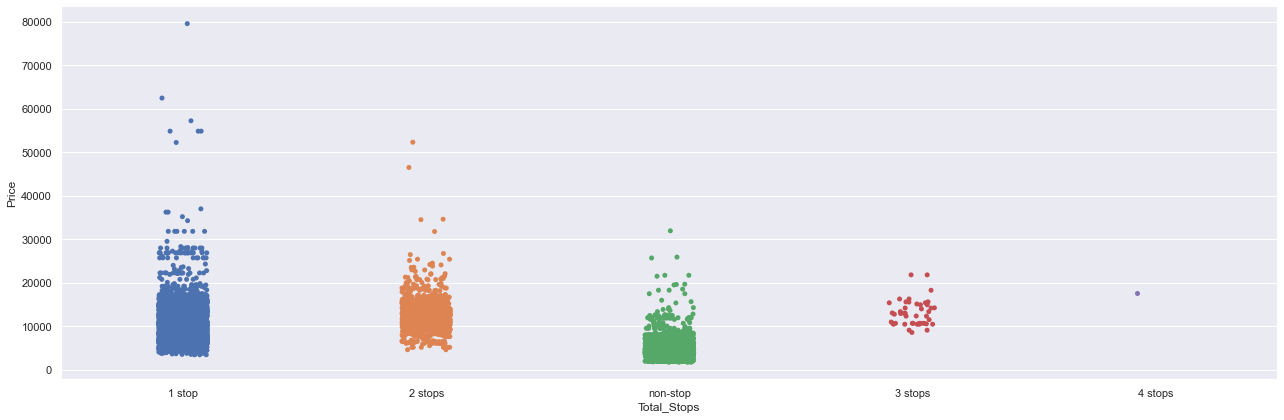

In [50]:
#price vs no of stops
sns.catplot(y = "Price",x = "Total_Stops", data = train_data.sort_values("Price",ascending=False), height = 6, aspect = 3)
plt.show()

In [51]:
#as we can see this is an ordinal data which can be replaced using label encoding
#so values a re assigned to each label
train_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace=True)
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22.33,1.17,2.83,0,3897,24.0,3.0
1,Air India,Kolkata,Banglore,5.83,13.25,7.42,2,7662,1.0,5.0
2,Jet Airways,Delhi,Cochin,9.42,4.42,19.00,2,13882,9.0,6.0
3,IndiGo,Kolkata,Banglore,18.08,23.50,5.42,1,6218,12.0,5.0
4,IndiGo,Banglore,New Delhi,16.83,21.58,4.75,1,13302,1.0,3.0


In [52]:
#concatenate dataframes for including the encoded categorical features
data_train = pd.concat([train_data,Airline,Source,Destination], axis = 1)
data_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,22.33,1.17,2.83,0,3897,24.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,5.83,13.25,7.42,2,7662,1.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,9.42,4.42,19.00,2,13882,9.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,18.08,23.50,5.42,1,6218,12.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,16.83,21.58,4.75,1,13302,1.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
#dropping redundant features
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_train.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,22.33,1.17,2.83,0,3897,24.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5.83,13.25,7.42,2,7662,1.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9.42,4.42,19.00,2,13882,9.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,18.08,23.50,5.42,1,6218,12.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,16.83,21.58,4.75,1,13302,1.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
data_train.shape

(10682, 27)

In [55]:
data_train.isnull().sum()
data_train = data_train.dropna()

CLEANING THE TEST DATA FOR PREDICTIONS (DOING SEPARATELY IN ORDER TO PREVENT DATA LEAKAGE LEADING TO OVERFITTING)

In [56]:
test_data = pd.read_excel(r"Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [57]:
#pre process test data
#time-date values
test_data.dropna(inplace=True)
test_data.head()

test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
test_data.drop(['Date_of_Journey'],axis=1,inplace=True)

test_data.Dep_Time = test_data['Dep_Time'].apply(lambda x: convertToHours(x))
test_data.Arrival_Time = test_data['Arrival_Time'].apply(lambda x: convertArrivalTimeToHour(x))

test_data.Duration = test_data['Duration'].apply(lambda x: cleanDuration(x))

#categorical values
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first = True)

Source = test_data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)

Destination = test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)

test_data.drop(["Route","Additional_Info"], axis=1, inplace=True)

test_data.replace({"non-stop": 0,"1 stop": 1,"2 stops": 2,"3 stops": 3,"4 stops": 4},inplace=True)

#concat
data_test = pd.concat([test_data,Airline,Source,Destination], axis = 1)

data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [58]:
data_test.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,17.50,4.42,10.92,1,6.0,6.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,6.33,10.33,4.00,1,12.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,19.25,19.00,23.75,1,21.0,5.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,8.00,21.00,13.00,1,21.0,5.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,23.92,2.75,2.83,0,24.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
data_test.shape

(2671, 25)

FEATURE SELECTION AND SCALING

In [60]:
data_train.columns

Index(['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [61]:
#independant variable X
X = data_train.loc[: , ['Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Journey_day', 'Journey_month', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,22.33,1.17,2.83,0,24.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5.83,13.25,7.42,2,1.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,9.42,4.42,19.00,2,9.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,18.08,23.50,5.42,1,12.0,5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,16.83,21.58,4.75,1,1.0,3.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
X.isnull().sum()



Dep_Time                                     0
Arrival_Time                                 0
Duration                                     0
Total_Stops                                  0
Journey_day                                  0
Journey_month                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi                                 0
Source_Kolkata                               0
Source_Mumbai                                0
Destination_C

In [63]:
#dependant variable y
y = data_train.iloc[:, 4]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

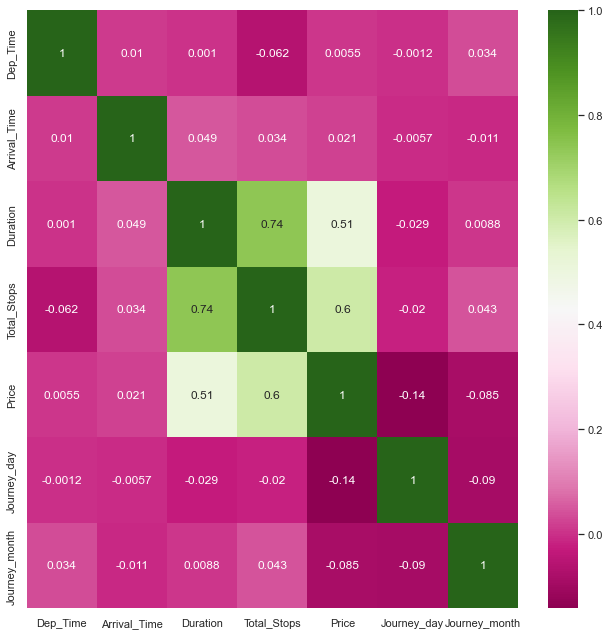

In [64]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (11,11))
sns.heatmap(train_data.corr(), annot = True, cmap = "PiYG")

plt.show()

In [65]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)


[4.25503500e-02 4.61282954e-02 1.47940280e-01 2.30522576e-01
 1.33268766e-01 5.25616868e-02 1.04955312e-02 2.37684585e-03
 1.37735641e-02 1.39832228e-01 7.13824234e-02 2.08724967e-02
 9.29710313e-04 3.27416082e-03 1.21991516e-04 5.16545291e-03
 1.15975076e-05 5.22596742e-04 1.18584719e-02 4.22193746e-03
 8.96872324e-03 1.29078808e-02 1.68045500e-02 7.29943819e-03
 4.96869619e-04 1.57115763e-02]


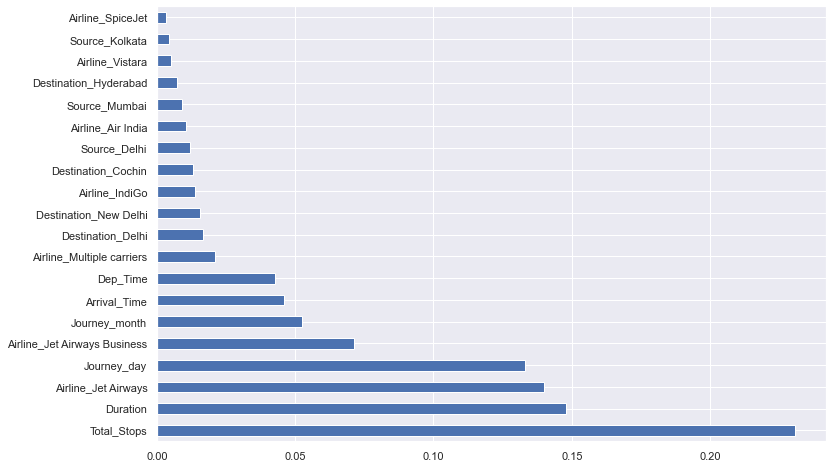

In [66]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

FITTING OUR MODEL USING RANDOM FOREST REGRESSOR
-> Scaling of data not required for random forest algorithm

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
y_pred = reg_rf.predict(X_test)

In [70]:
reg_rf.score(X_train, y_train)

0.9521646308280484

In [71]:
reg_rf.score(X_test, y_test)

0.7932997610838618

c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


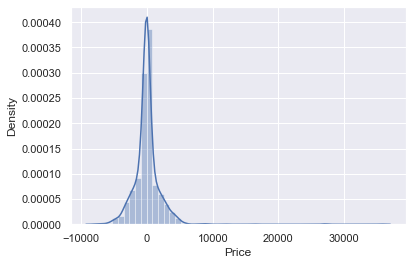

In [72]:
#plotting actual results vs predictions
sns.distplot(y_test-y_pred)
plt.show()

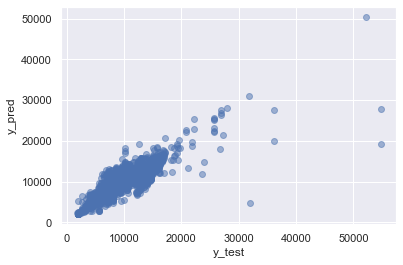

In [73]:
#visualizing our accuracy using a scatter plot
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
#trying other metrics of accuracy
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1175.6524221892455
MSE: 4489025.278433171
RMSE: 2118.7319977838565


In [75]:
#r2 score
metrics.r2_score(y_test, y_pred)

0.7932997610838618

HYPERPARAMETER TUNING FOR BETTER RESULTS

In [76]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
#Assigning hyperparameters in form of dictionary where each key represents the hyperparameter and its value is the list containing the possible solutions to exlpore
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [78]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [79]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.0s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.2s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.4s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.7s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.6s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   7.0s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.2s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   6.0s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.8s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.9s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.1s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.1s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.1s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.3s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   9.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  10.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.2s
[CV] END max_depth=5, max_feat

c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.5s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.1s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.8s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  10.9s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  11.3s


c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
#listing out the best hyperparameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [81]:
prediction = rf_random.predict(X_test)

c:\Users\Sanjeet\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


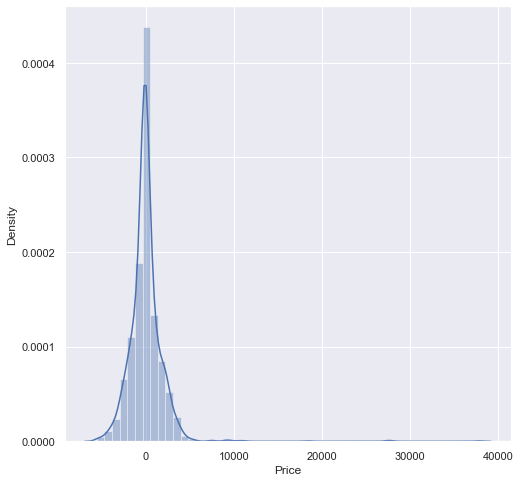

In [82]:
#visualizing accuracy for this new tuned model
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

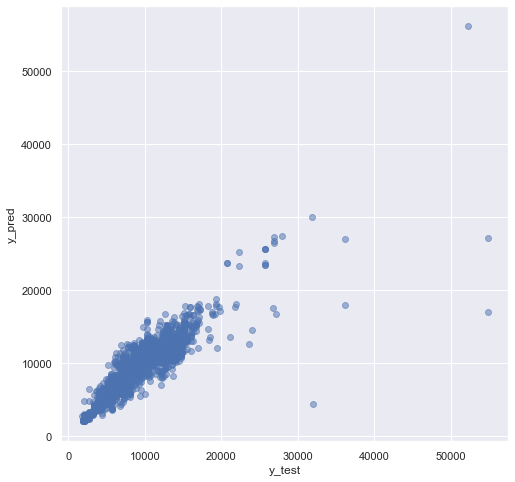

In [83]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [84]:
#print accuracy
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('r2_score:',metrics.r2_score(y_test, y_pred))

MAE: 1154.1778426043554
MSE: 4188063.7095531593
RMSE: 2046.4759244987856
r2_score: 0.7932997610838618


SAVING OUR MODEL INTO PKL FILE

In [85]:
import pickle
# open a file, in this directory to store my binary pickle file
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [86]:
import pickle

#testing saved model
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [87]:
y_prediction = forest.predict(X_test)

In [88]:
metrics.r2_score(y_test, y_prediction)


0.8071577423456174